In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Titanic dataset
train_data = pd.read_csv(r'C:\Users\student\Downloads\titanic.csv')

# Preview the data
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:


# Step 2: Handle missing values
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Fare'] = train_data['Fare'].fillna(train_data['Fare'].median())
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

# Step 3: Drop unnecessary columns that are not useful for modeling
train_data = train_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

# Step 4: One-hot encode categorical variables ('Sex' and 'Embarked')
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

# Step 5: Define features (X) and target variable (y)
# Here we predict 'Fare' (continuous), so 'Fare' is the target
X = train_data.drop('Fare', axis=1)
y = train_data['Fare']

# Step 6: Scale features using StandardScaler (important for SVR)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 8: Train the SVR model
svr = SVR(kernel='rbf')  # You can try kernel='linear' or 'poly' too
svr.fit(X_train, y_train)

# Step 9: Make predictions on the test set
y_pred = svr.predict(X_test)

# Step 10: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Absolute Error: 13.41
Mean Squared Error: 1162.18
R-squared: 0.25


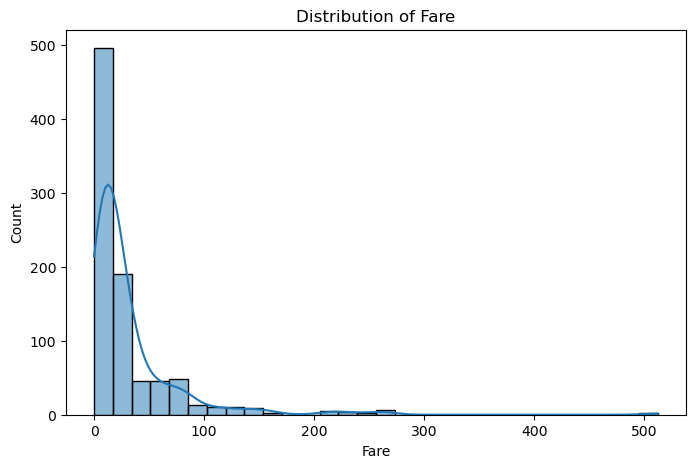

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize distribution of Fare (target variable)
plt.figure(figsize=(8,5))
sns.histplot(train_data['Fare'], bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()



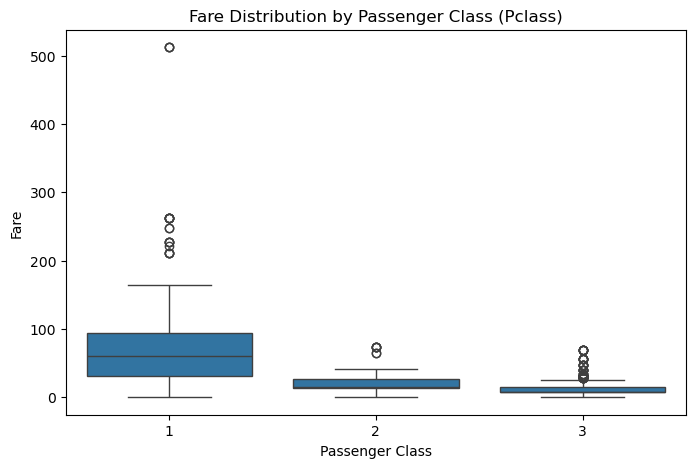

In [10]:
# 2. Visualize Fare by Pclass (passenger class)
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass', y='Fare', data=train_data)
plt.title('Fare Distribution by Passenger Class (Pclass)')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()



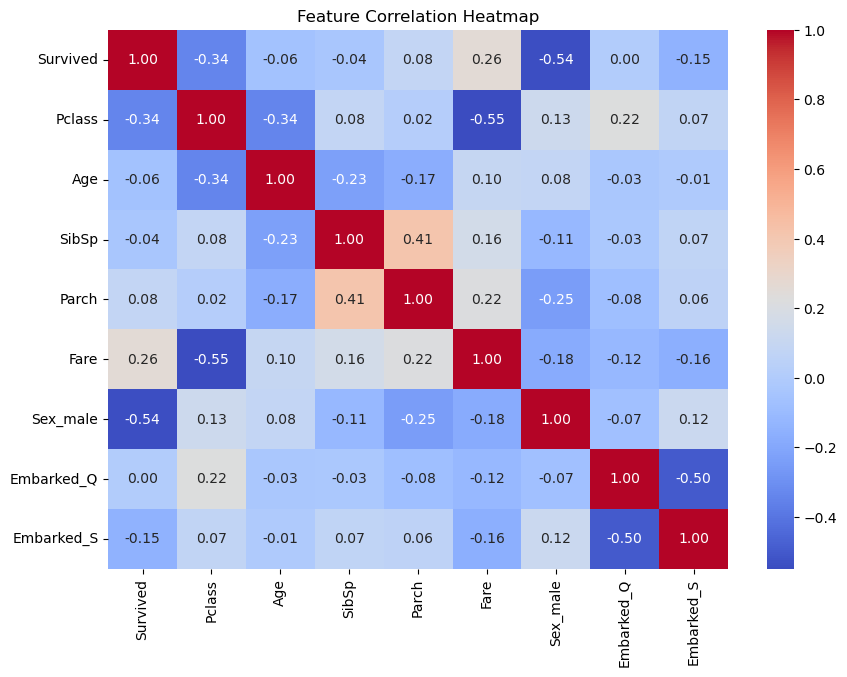

In [11]:
# 3. Correlation heatmap of features + Fare
plt.figure(figsize=(10,7))
corr = train_data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()



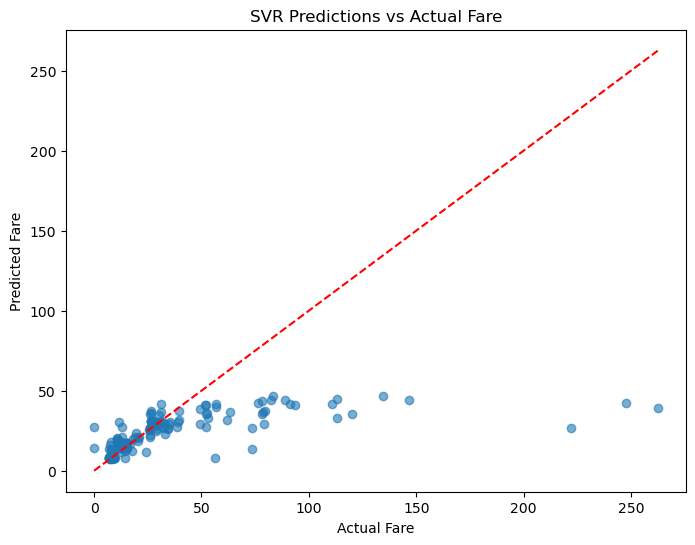

In [12]:
# 4. Plot predicted vs actual Fare on test set
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # line y=x
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('SVR Predictions vs Actual Fare')
plt.show()




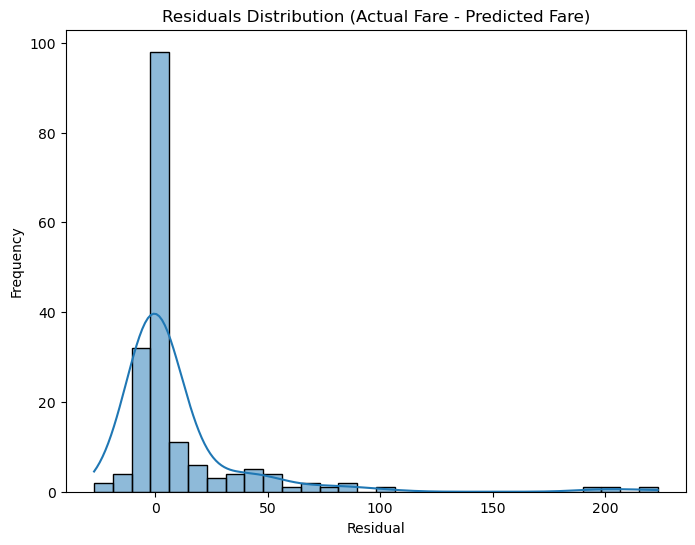

In [13]:
# 5. Residual plot (difference between actual and predicted)
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Residuals Distribution (Actual Fare - Predicted Fare)')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()